# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### Answer Problem 1: 
The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

#### Note: 
I will assign to the dataframe 'bank' as the initial dataframe and will change it to the simpler 'df' in Problem 5 where, as required, we will retain only the first 7 columns for the rest of the analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn import set_config
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
set_config(display="diagram")
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
from sklearn.dummy import DummyClassifier
from sklearn.metrics import RocCurveDisplay

from sklearn.datasets import load_digits
from sklearn import datasets, metrics
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV

In [2]:
# Importing the csv into the dataframe 'bank' specifiying the separator ';'
bank = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
#visualize the dataframe, default .head()
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



#### Note: according to the dataset description the data has already been cleaned. 

In [4]:
# first step is checking for missing values
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# explore the two labels
bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

#### Observation: 
The dataframe does not have any missing values

<AxesSubplot:xlabel='y', ylabel='count'>

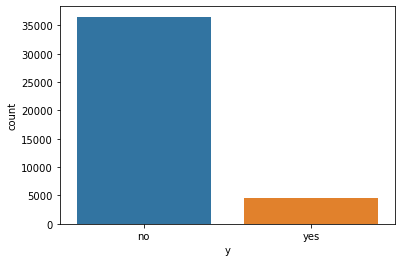

In [6]:
# visualize the balance of the two classes
sns.countplot(bank['y'])

#### Note: 
The two classes / labels are very unbalanced.

Looking at the first 7 features (later on we will only use those first 7 columns as required).

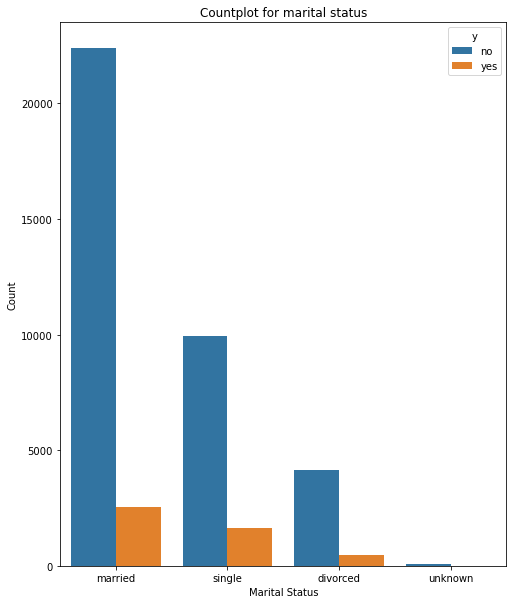

In [7]:
# countplot marital staus
plt.figure(figsize=(8, 10))
sns.countplot(bank['marital'], hue = bank['y'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Countplot for marital status');

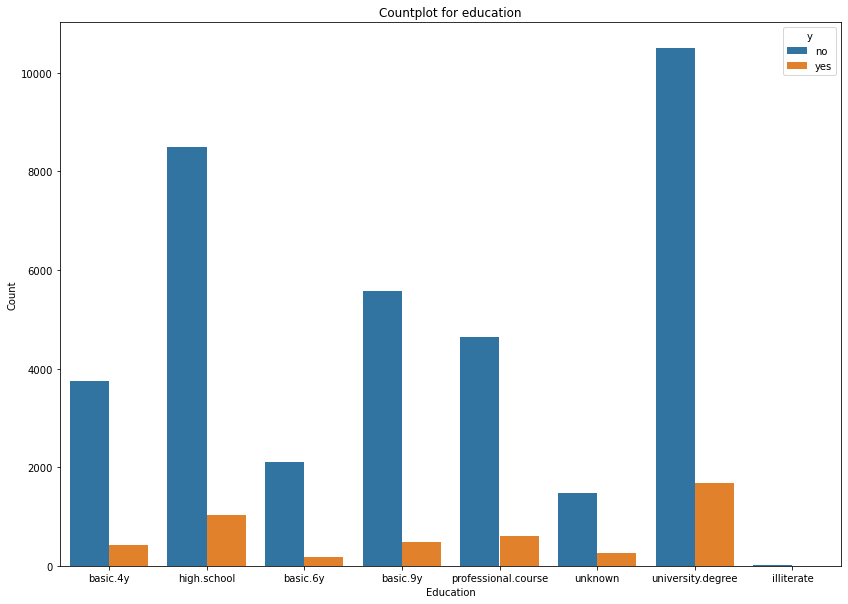

In [8]:
# countplot education
plt.figure(figsize=(14, 10))
sns.countplot(bank['education'], hue = bank['y'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Countplot for education');

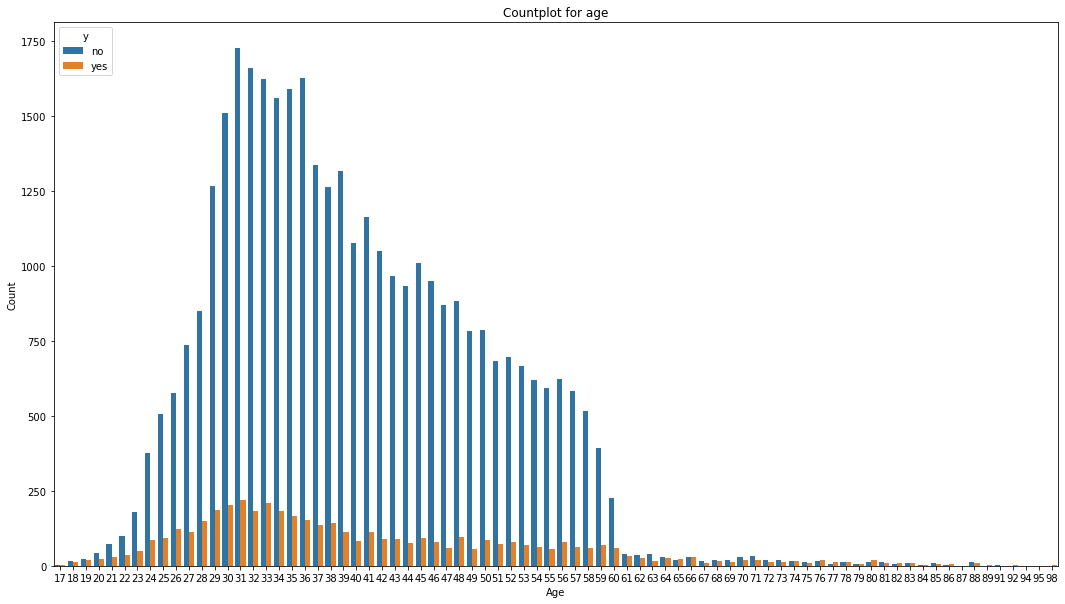

In [9]:
# countplot age
plt.figure(figsize=(18, 10))
sns.countplot(bank['age'], hue = bank['y'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Countplot for age');

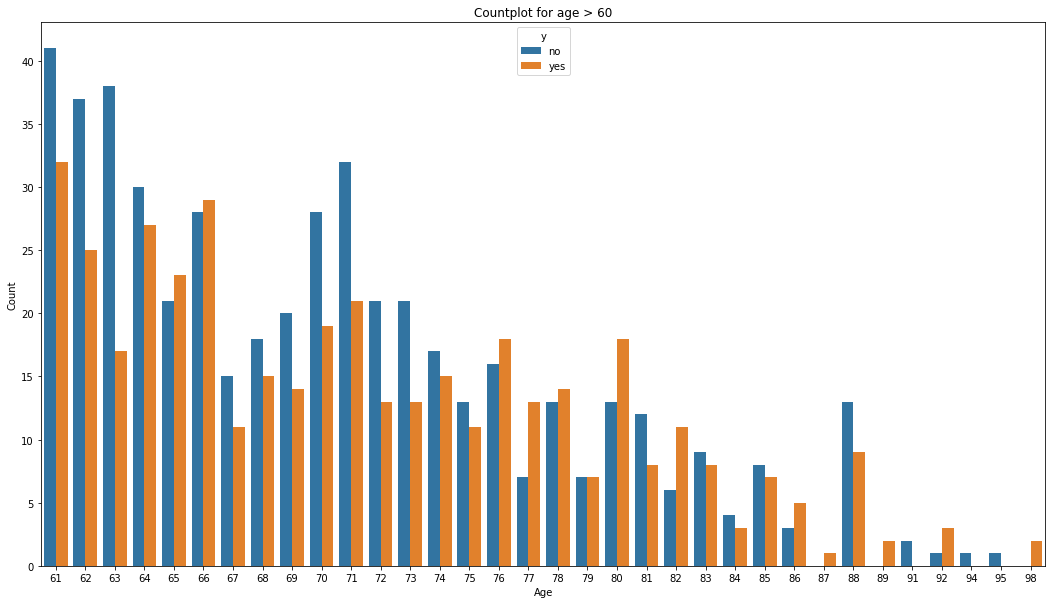

In [10]:
# countplot upper age group > 60
bank_age = bank.drop(bank.loc[bank['age'] < 61].index)
plt.figure(figsize=(18, 10))
sns.countplot(bank_age['age'], hue = bank_age['y'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Countplot for age > 60');

Observation: Interestingly enough, the labels are far more balanced in this age group. However, it is somehow unlikely that this age group is the focus of the bank.  

Note: There are too many distinct values for the age, so grouping them in fewer ranges might help.

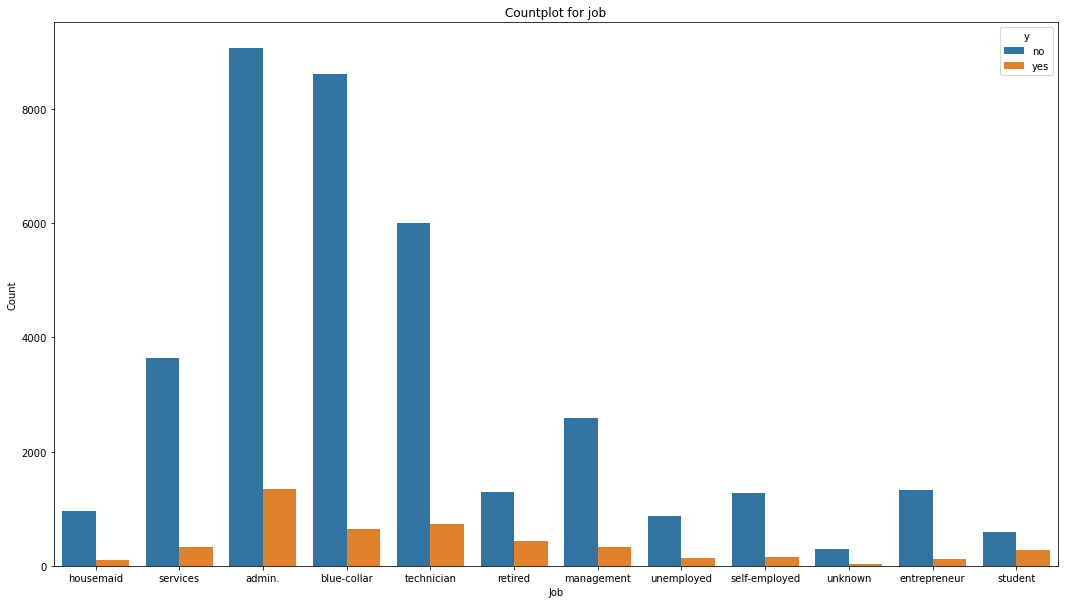

In [11]:
# countplot job
plt.figure(figsize=(18, 10))
sns.countplot(bank['job'], hue = bank['y'])
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Countplot for job');

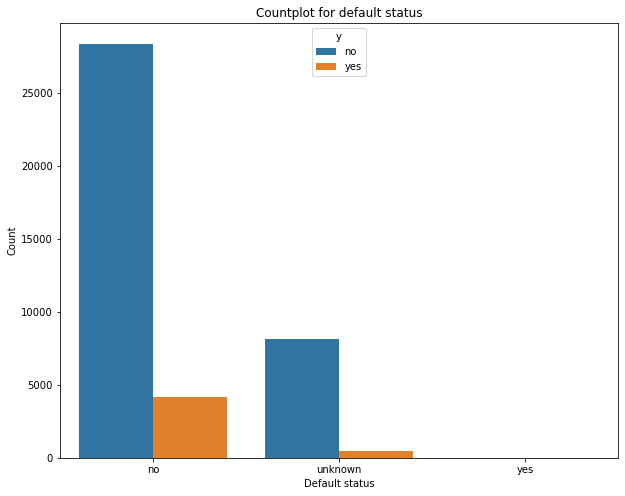

In [12]:
# countplot default 
plt.figure(figsize=(10, 8))
sns.countplot(bank['default'], hue = bank['y'])
plt.xlabel('Default status')
plt.ylabel('Count')
plt.title('Countplot for default status');

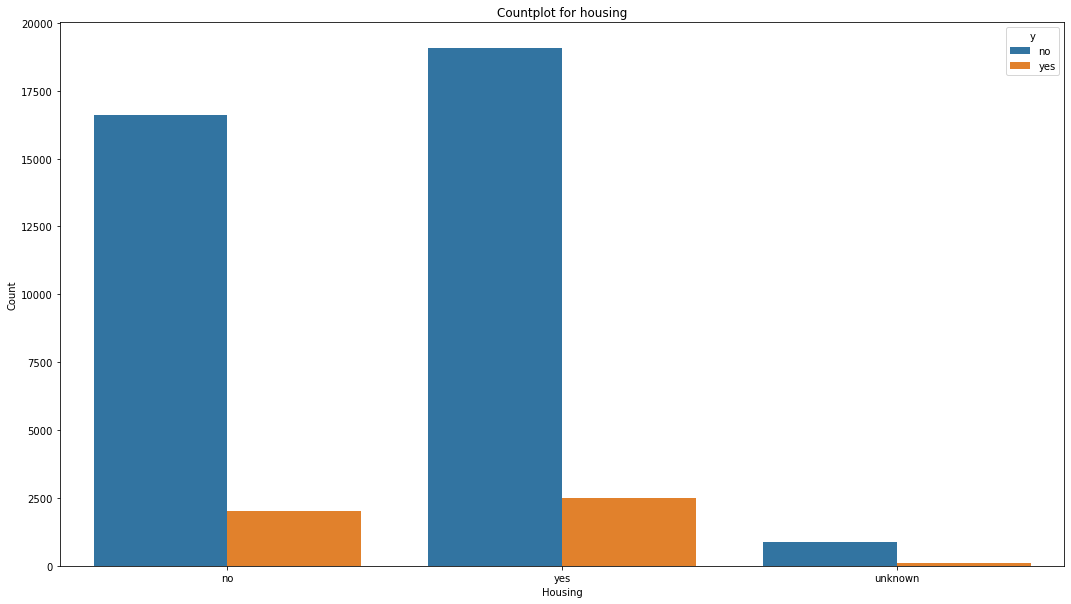

In [13]:
# countplot housing
plt.figure(figsize=(18, 10))
sns.countplot(bank['housing'], hue = bank['y'])
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Countplot for housing');

#### Observations: 
* There are a lot of categorical features which will require encoding using OneHotEncoder or Label Encoding. The labels should also be changed to numeric, '1' for 'yes and '0' for 'no'
* For each feature the label distribution is as expected unbalanced. Higher age group seems to be more balanced

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [14]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Business objective
Background: There are huge pressures for European banks to increase financial assets. To solve this issue, one adopted strategy is offer attractive long-term deposit applications with good interest rates, specifically by using direct marketing campaigns. 
The overall business goal is to increase efficiency of directed campaigns for long-term deposit subscriptions by reducing the number of contacts to do.
The goal of this Machine Learning analysis is to find a model that can explain the success of a contact, i.e. if the client subscribes the deposit thus making it a classification problem. Such model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.

#### This application objective: 
Find the best model that can tell the bank whether a customer call will produce a new deposit subscription. Do this by comparing the performance of the classifiers k-nearest neighbors, logistic regression, decision trees, and support vector machines.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [15]:
# reload the data and show info
bank = pd.read_csv('data/bank-additional-full.csv', sep = ';')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
# Take the full dataframe and reduce it to the indicated columns 1-7 (0-6)
# Will call the main dataframe 'df'for simplicity
df = bank.drop(columns = ['contact','month','day_of_week','duration','campaign','pdays','previous',
                        'poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])
df.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


In [17]:
## 'age' has too many distinct values, so it might be a good solution to group in a fewer categories and encode

df.loc[df['age'] <= 35, 'age'] = 1
df.loc[(df['age'] > 35) & (df['age'] <= 40), 'age'] = 2
df.loc[(df['age'] > 40) & (df['age'] <= 50), 'age'] = 3
df.loc[(df['age'] > 50) & (df['age'] <= 60), 'age'] = 4
df.loc[(df['age'] > 60) & (df['age'] <= 67), 'age'] = 5
df.loc[df['age'] > 67, 'age'] = 6
df.head()

,age,job,marital,education,default,housing,loan,y
0,4,housemaid,married,basic.4y,no,no,no,no
1,4,services,married,high.school,unknown,no,no,no
2,2,services,married,high.school,no,yes,no,no
3,2,admin.,married,basic.6y,no,no,no,no
4,4,services,married,high.school,no,no,yes,no


In [18]:
# first change the 'y' label into numbers
df['y'] = df['y'].replace(['yes', 'no'], [1, 0])
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [19]:
# create the feature categories
categ = ['job','marital','education','default','housing','loan']

In [20]:
# create a column transformer
col_transformer = ColumnTransformer([('ohe', OneHotEncoder(drop="if_binary"), categ)],
                            remainder = 'passthrough')
# will apply the transformer to the train and test sets

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [21]:
# define X and y
X = df.drop('y', axis = 1)
y = df['y']

In [22]:
# split the data in initial non transformed data
Xi_train, Xi_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [23]:
# transform the data
X_train = col_transformer.fit_transform(Xi_train)
X_test = col_transformer.transform(Xi_test)

In [24]:
# inspect y_train and y_test
print(y_train.value_counts())
print(y_test.value_counts())

0    29262
1     3688
Name: y, dtype: int64
0    7286
1     952
Name: y, dtype: int64


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [25]:
# use a DummyClassifier with the training data and score the estimator
dummy_clf = DummyClassifier()
start = time.time()
dummy_clf.fit(X_train, y_train)
stop = time.time()

Fit time is: 3.847360610961914 ms

Dummy model score is: 0.8844379703811605 

Classification report for classifier DummyClassifier():
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7286
           1       0.00      0.00      0.00       952

    accuracy                           0.88      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.78      0.88      0.83      8238




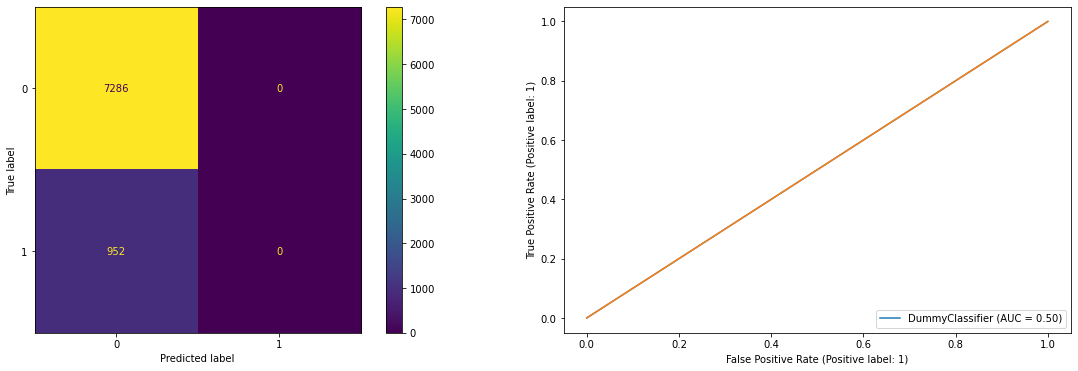

In [26]:
# print the fit time and the score
print('Fit time is:',(stop-start)*1000,'ms\n')
print('Dummy model score is:', dummy_clf.score(X_test, y_test),'\n')
print(
    f"Classification report for classifier {dummy_clf}:\n"
    f"{metrics.classification_report(y_test, dummy_clf.predict(X_test))}\n");

#print the confusion matrix and the ROC curve
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(dummy_clf, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(dummy_clf, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

So the dummy base model gives an AUC of 0.5 which makes this borderline not uselful. Baseline.

#### Observation: 
Although the score is quite high, the model is not capable of handling the '1' label, practically guessing wrong every time, as visible in the ROC-AUC graph. For our grid search we should use the 'roc_auc' scoring method so we can determine the proper best parameters. 

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [27]:
# build a basic default Logistic Regression model, fit on train data
lgr_def = LogisticRegression()
start_l_d = time.time()
lgr_def.fit(X_train, y_train)
stop_l_d = time.time()
t_lgr_def = (stop_l_d-start_l_d)*1000
lgr_def_acc_tr = accuracy_score(y_train, lgr_def.predict(X_train))
lgr_def_acc_ts = accuracy_score(y_test, lgr_def.predict(X_test))

### Problem 9: Score the Model

What is the accuracy of your model?

In [28]:
# print the score for train and test
print('Train accuracy score for default LogisticRegression model:', lgr_def_acc_tr)
print('Test accuracy score for default LogisticRegression model:', lgr_def_acc_ts)

Train accuracy score for default LogisticRegression model: 0.8880728376327769
Test accuracy score for default LogisticRegression model: 0.8844379703811605


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

KNN, Decision Tree, SVC models with default settings

In [29]:
# build a KNN model with default settings and find the accuracy score for train and test
knn_def = KNeighborsClassifier()
start_k_d = time.time()
knn_def.fit(X_train, y_train)
stop_k_d = time.time()
t_knn_def = (stop_k_d-start_k_d)*1000
knn_def_acc_tr = accuracy_score(y_train, knn_def.predict(X_train))
knn_def_acc_ts = accuracy_score(y_test, knn_def.predict(X_test))
print('Train accuracy score for default KNN model:', knn_def_acc_tr)
print('Test accuracy score for default KNN model:', knn_def_acc_ts)

Train accuracy score for default KNN model: 0.8781183611532625
Test accuracy score for default KNN model: 0.8696285506190823


In [30]:
# build a Decision Tree model with default settings and find the accuracy score for train and test
dtr_def = DecisionTreeClassifier()
start_d_d = time.time()
dtr_def.fit(X_train, y_train)
stop_d_d = time.time()
t_dtr_def = (stop_d_d-start_d_d)*1000
dtr_def_acc_tr = accuracy_score(y_train, dtr_def.predict(X_train))
dtr_def_acc_ts = accuracy_score(y_test, dtr_def.predict(X_test))
print('Train accuracy score for default DecisionTree model:', dtr_def_acc_tr)
print('Test accuracy score for default DecisionTree model:', dtr_def_acc_ts)

Train accuracy score for default DecisionTree model: 0.895690440060698
Test accuracy score for default DecisionTree model: 0.878975479485312


In [31]:
# build a SVC model with default settings and find the accuracy score for train and test
svc_def = SVC()
start_s_d = time.time()
svc_def.fit(X_train, y_train)
stop_s_d = time.time()
t_svc_def = (stop_s_d-start_s_d)*1000
svc_def_acc_tr = accuracy_score(y_train, svc_def.predict(X_train))
svc_def_acc_ts = accuracy_score(y_test, svc_def.predict(X_test))
print('Train accuracy score for default SVC model:', svc_def_acc_tr)
print('Test accuracy score for default SVC model:', svc_def_acc_ts)

Train accuracy score for default SVC model: 0.8880728376327769
Test accuracy score for default SVC model: 0.8844379703811605


In [32]:
# putting the results in a comparison table
data_def = {'Model': ['Logistic Regression', 'KNN','Decision Tree', 'SVM'],
            'Train Time(ms)': [t_lgr_def, t_knn_def, t_dtr_def, t_svc_def],
            'Train Accuracy': [lgr_def_acc_tr, knn_def_acc_tr, dtr_def_acc_tr, svc_def_acc_tr],
            'Test Accuracy': [lgr_def_acc_ts, knn_def_acc_ts, dtr_def_acc_ts, svc_def_acc_ts],}
summary_df = pd.DataFrame(data_def).set_index('Model')
print('\033[1m  Comparison Table for default models')
summary_df

  Comparison Table for default models


,Train Time(ms),Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,381.429911,0.888073,0.884438
KNN,5.667925,0.878118,0.869629
Decision Tree,394.830942,0.895690,0.878975
SVM,38845.149040,0.888073,0.884438


Printing the Confusion Matrix and the ROC curve

Fit time is: 3.847360610961914 ms

Logistic Regression Basic score is: 0.8844379703811605 

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7286
           1       0.00      0.00      0.00       952

    accuracy                           0.88      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.78      0.88      0.83      8238




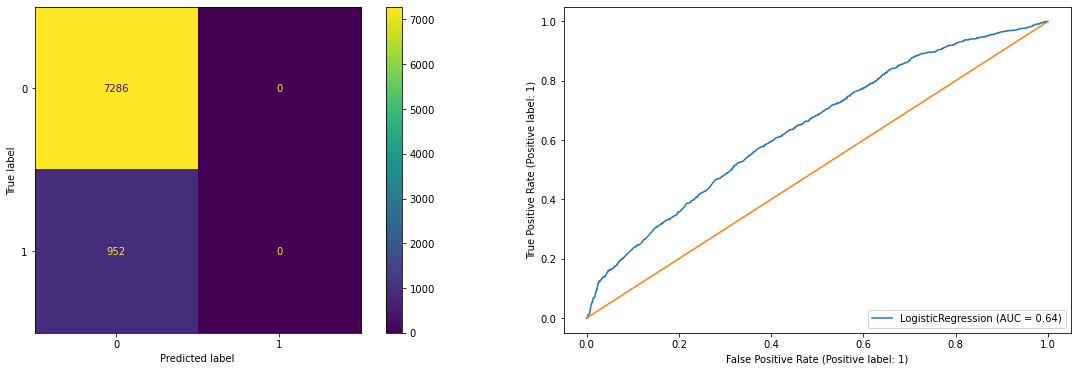

In [33]:
# print the LogisticRegression score and the classification report
print('Fit time is:',(stop-start)*1000,'ms\n')
print('Logistic Regression Basic score is:', lgr_def.score(X_test, y_test),'\n')
print(
    f"Classification report for classifier {lgr_def}:\n"
    f"{metrics.classification_report(y_test, lgr_def.predict(X_test))}\n");

#print the confusion matrix and the ROC curve
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr_def, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr_def, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

Observation: the model gives good resuts only on the negative (0) labels. All the predictions on lable '1' are wrong.

KNN default score is: 0.8696285506190823 

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7286
           1       0.26      0.07      0.11       952

    accuracy                           0.87      8238
   macro avg       0.57      0.52      0.52      8238
weighted avg       0.82      0.87      0.83      8238




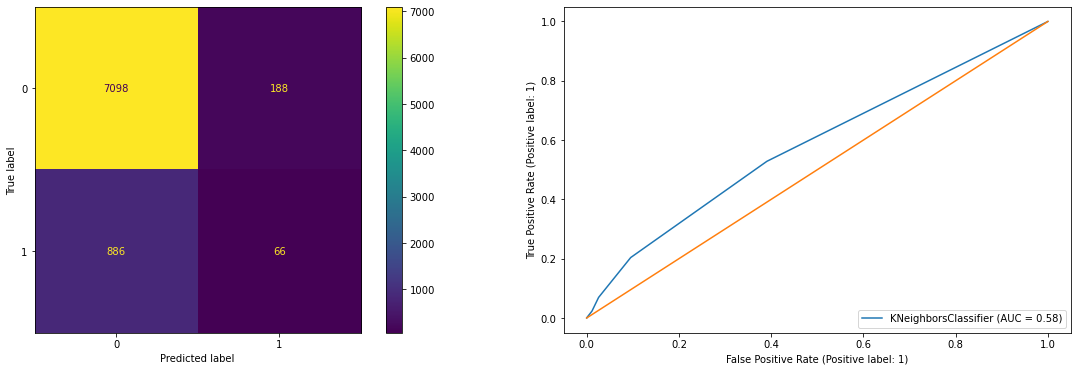

In [34]:
# print the KNN default score and the classification report
print('KNN default score is:', knn_def.score(X_test, y_test),'\n')
print(
    f"Classification report for classifier {knn_def}:\n"
    f"{metrics.classification_report(y_test, knn_def.predict(X_test))}\n");

#print the confusion matrix and the ROC curve
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(knn_def, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(knn_def, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

Decision Tree

Decision Tree default score is: 0.878975479485312 

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7286
           1       0.33      0.05      0.08       952

    accuracy                           0.88      8238
   macro avg       0.61      0.52      0.51      8238
weighted avg       0.82      0.88      0.84      8238




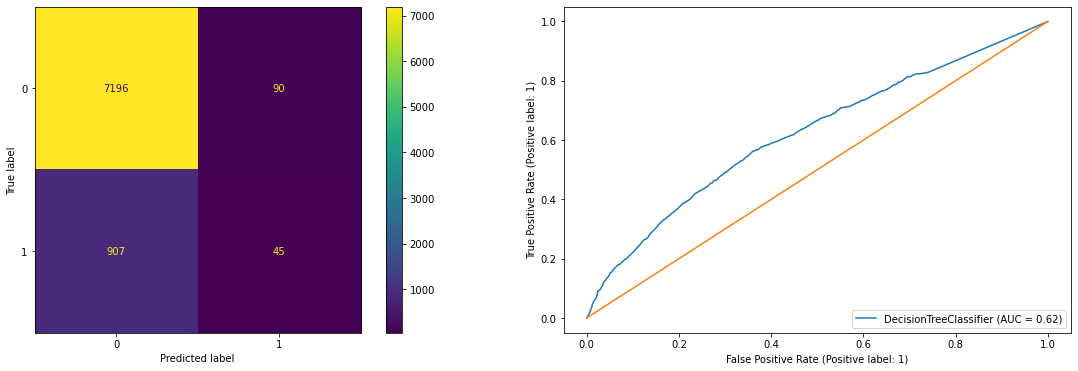

In [35]:
# print the DecisionTree score and the classification report
print('Decision Tree default score is:', dtr_def.score(X_test, y_test),'\n')
print(
    f"Classification report for classifier {dtr_def}:\n"
    f"{metrics.classification_report(y_test, dtr_def.predict(X_test))}\n");

#print the confusion matrix and the ROC curve
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(dtr_def, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(dtr_def, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

SVC

SVC default score is: 0.8844379703811605 

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7286
           1       0.00      0.00      0.00       952

    accuracy                           0.88      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.78      0.88      0.83      8238




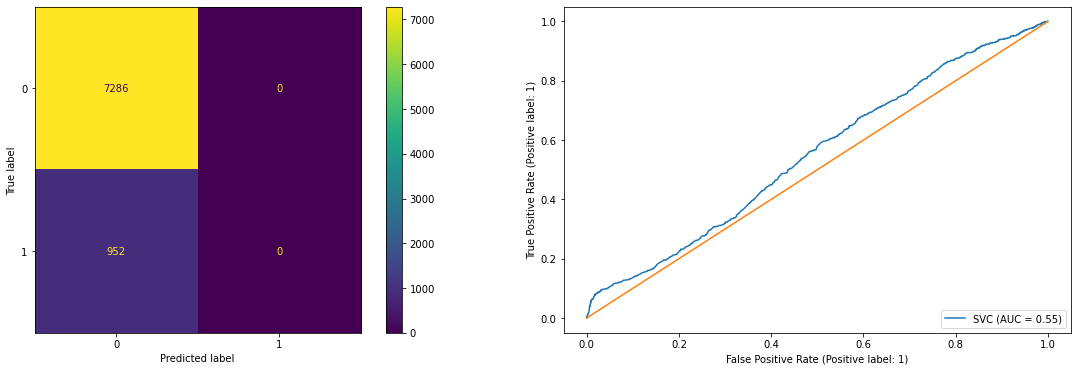

In [36]:
# print the SVC score and the classification report
print('SVC default score is:', svc_def.score(X_test, y_test),'\n')
print(
    f"Classification report for classifier {svc_def}:\n"
    f"{metrics.classification_report(y_test, svc_def.predict(X_test))}\n");

#print the confusion matrix and the ROC curve
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(svc_def, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(svc_def, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

#### Observation:

Decision Tree default model has the best performance. 

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Note: The gender feature does not exist, but dropping some of the features can be considered. 

#### Hyperparameter tuning and grid search

##### Observation:
This is a classification problem on a dataset which has very unbalanced labels. Thus, using accuracy for scoring is not relevant since it may show a very high accuracy score but in reality the model is not capable to handle well both labels. As it results from the previous results, the score is high, but the AUC is very poor and the confusion matrix shows poor results as well. Some models, such as SVC and Logistic Regression have high scores of 0.88, but are not capable to predict anything for the label '1', thus rendering the models useless. 

Considering all these, for GridSearchCV, to find the best parameters, I will use 'roc_auc' as scoring method. 

Using GridSearchCV to find the best hyperparameters

In [37]:
# Logistic Regression grid
lgr = LogisticRegression()
params_lgr = {'C':np.logspace(-5, .5),
            'solver': ['lbfgs', 'liblinear'],
             'penalty' : ['l1','l2']}
grid_lgr = GridSearchCV(lgr, param_grid = params_lgr,
                   scoring = 'roc_auc').fit(X_train, y_train)
lgr_score = grid_lgr.score(X_test, y_test)
time_lgr = round((grid_lgr.cv_results_['mean_fit_time'].sum())*1000, 3)
lgr_par = grid_lgr.best_params_
print('lgr score is:', lgr_score)
print('fit time lgr is:',time_lgr)
print('lgr parameters:', lgr_par)

lgr score is: 0.6434003020642789
fit time lgr is: 30331.663
lgr parameters: {'C': 0.030171148105292957, 'penalty': 'l2', 'solver': 'lbfgs'}


In [38]:
# KNN grid
knn = KNeighborsClassifier()
params_knn = {'n_neighbors':range(1, 20, 2)}
grid_knn = GridSearchCV(knn, param_grid = params_knn,
                   scoring = 'roc_auc').fit(X_train, y_train)
knn_score = grid_knn.score(X_test, y_test)
time_knn = round((grid_knn.cv_results_['mean_fit_time'].sum())*1000, 3)
knn_par = grid_knn.best_params_
print('knn score is:', knn_score)
print('fit time knn is:',time_knn)
print('knn parameters:', knn_par)

knn score is: 0.6304728245951139
fit time knn is: 44.543
knn parameters: {'n_neighbors': 19}


In [39]:
# Decision Tree grid
dtr = DecisionTreeClassifier()
params_dtr = {'max_depth': [None, 3000, 50, 45, 30, 20, 10, 5, 3, 1],
         'min_samples_split': [2, 5, 10],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [1, 2, 3, 4]
             }
grid_dtr = GridSearchCV(dtr, param_grid = params_dtr,
                   scoring = 'roc_auc').fit(X_train, y_train)
dtr_score = grid_dtr.score(X_test, y_test)
time_dtr = round((grid_dtr.cv_results_['mean_fit_time'].sum())*1000, 3)
dtr_par = grid_dtr.best_params_
print('dtr score is:', dtr_score)
print('fit time dtr is:',time_dtr)
print('dtr parameters:', dtr_par)

dtr score is: 0.6425311031631978
fit time dtr is: 36725.958
dtr parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}


In [40]:
# SVC grid
svc = SVC()
params_svc = {'kernel': ['rbf','sigmoid'],'gamma': [0.1, 1.0, 10.0, 100.0]}
grid_svc = GridSearchCV(svc, param_grid = params_svc,
                   scoring = 'roc_auc').fit(X_train, y_train)
svc_score = grid_svc.score(X_test, y_test)
time_svc = round((grid_svc.cv_results_['mean_fit_time'].sum())*1000, 3)
svc_par = grid_svc.best_params_
print('svc score is:', svc_score)
print('fit time svc is:',time_svc)
print('svc parameters:', svc_par)

svc score is: 0.5779458331507185
fit time svc is: 115782.475
svc parameters: {'gamma': 0.1, 'kernel': 'rbf'}


#### Note:
Since the parameters reflect the best AUC, I will use the best parameters to run each model separately and then compare and visualize the results.

The tuned models:

In [41]:
# Tuned Linear Regression
lgr_tun = LogisticRegression(C= lgr_par['C'], penalty= lgr_par['penalty'], solver= lgr_par['solver'])
start_l_t = time.time()
lgr_tun.fit(X_train, y_train)
stop_l_t = time.time()
t_lgr_tun = (stop_l_t-start_l_t)*1000
lgr_tun_acc_tr = accuracy_score(y_train, lgr_tun.predict(X_train))
lgr_tun_acc_ts = accuracy_score(y_test, lgr_tun.predict(X_test))
print('Train accuracy score for tuned LogisticRegression model:', lgr_tun_acc_tr)
print('Test accuracy score for tuned LogisticRegression model:', lgr_tun_acc_ts)

Train accuracy score for tuned LogisticRegression model: 0.8880728376327769
Test accuracy score for tuned LogisticRegression model: 0.8844379703811605


In [42]:
# Tuned KNN 
knn_tun = KNeighborsClassifier(n_neighbors = knn_par['n_neighbors'])
start_k_t = time.time()
knn_tun.fit(X_train, y_train)
stop_k_t = time.time()
t_knn_tun = (stop_k_t-start_k_t)*1000
knn_tun_acc_tr = accuracy_score(y_train, knn_tun.predict(X_train))
knn_tun_acc_ts = accuracy_score(y_test, knn_tun.predict(X_test))
print('Train accuracy score for tuned KNN model:', knn_tun_acc_tr)
print('Test accuracy score for tuned KNN model:', knn_tun_acc_ts)

Train accuracy score for tuned KNN model: 0.8886798179059181
Test accuracy score for tuned KNN model: 0.8834668608885652


In [43]:
# Tuned Decision Tree
dtr_tun = DecisionTreeClassifier(criterion= dtr_par['criterion'], 
                                 max_depth= dtr_par['max_depth'], 
                                 min_samples_leaf= dtr_par['min_samples_leaf'], 
                                 min_samples_split= dtr_par['min_samples_split'])
start_d_t = time.time()
dtr_tun.fit(X_train, y_train)
stop_d_t = time.time()
t_dtr_tun = (stop_d_t-start_d_t)*1000
dtr_tun_acc_tr = accuracy_score(y_train, dtr_tun.predict(X_train))
dtr_tun_acc_ts = accuracy_score(y_test, dtr_tun.predict(X_test))
print('Train accuracy score for tuned DecisionTree model:', dtr_tun_acc_tr)
print('Test accuracy score for tuned DecisionTree model:', dtr_tun_acc_ts)

Train accuracy score for tuned DecisionTree model: 0.8895599393019726
Test accuracy score for tuned DecisionTree model: 0.8833454722019908


In [44]:
# Tuned SVC
svc_tun = SVC(gamma= svc_par['gamma'], kernel= svc_par['kernel'])
start_s_t = time.time()
svc_tun.fit(X_train, y_train)
stop_s_t = time.time()
t_svc_tun = (stop_s_t-start_s_t)*1000
svc_tun_acc_tr = accuracy_score(y_train, svc_tun.predict(X_train))
svc_tun_acc_ts = accuracy_score(y_test, svc_tun.predict(X_test))
print('Train accuracy score for tuned SVC model:', svc_tun_acc_tr)
print('Test accuracy score for tuned SVC model:', svc_tun_acc_ts)

Train accuracy score for tuned SVC model: 0.8880728376327769
Test accuracy score for tuned SVC model: 0.8844379703811605


In [45]:
# putting the tuned results in a comparison table
data_tun = {'Tuned Model': ['Logistic Regression', 'KNN','Decision Tree', 'SVM'],
            'Train Time(ms)': [t_lgr_tun, t_knn_tun, t_dtr_tun, t_svc_tun],
            'Train Accuracy': [lgr_tun_acc_tr, knn_tun_acc_tr, dtr_tun_acc_tr, svc_tun_acc_tr],
            'Test Accuracy': [lgr_tun_acc_ts, knn_tun_acc_ts, dtr_tun_acc_ts, svc_tun_acc_ts],}
summary_t_df = pd.DataFrame(data_tun).set_index('Tuned Model')
print('\033[1m  Comparison Table for tuned models')
summary_t_df

  Comparison Table for tuned models


,Train Time(ms),Train Accuracy,Test Accuracy
Tuned Model,,,
Logistic Regression,208.119154,0.888073,0.884438
KNN,5.025148,0.888680,0.883467
Decision Tree,123.929024,0.889560,0.883345
SVM,38580.908060,0.888073,0.884438


Visualize the classification report, the confusion matrix and the AUC curve for each of the tuned model

Logistic Regression tuned score is: 0.8844379703811605 

Classification report for classifier LogisticRegression(C=0.030171148105292957):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7286
           1       0.00      0.00      0.00       952

    accuracy                           0.88      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.78      0.88      0.83      8238




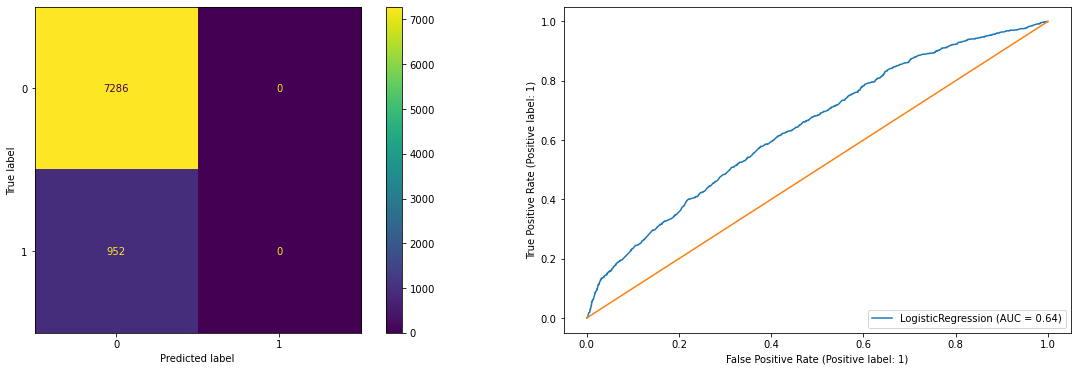

In [46]:
# print the tuned Logistic Regression score and the classification report
print('Logistic Regression tuned score is:', lgr_tun.score(X_test, y_test),'\n')
print(
    f"Classification report for classifier {lgr_tun}:\n"
    f"{metrics.classification_report(y_test, lgr_tun.predict(X_test))}\n");

#print the confusion matrix and the ROC curve
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr_tun, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr_tun, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

KNN tuned score is: 0.8834668608885652 

Classification report for classifier KNeighborsClassifier(n_neighbors=19):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7286
           1       0.43      0.03      0.05       952

    accuracy                           0.88      8238
   macro avg       0.66      0.51      0.49      8238
weighted avg       0.83      0.88      0.84      8238




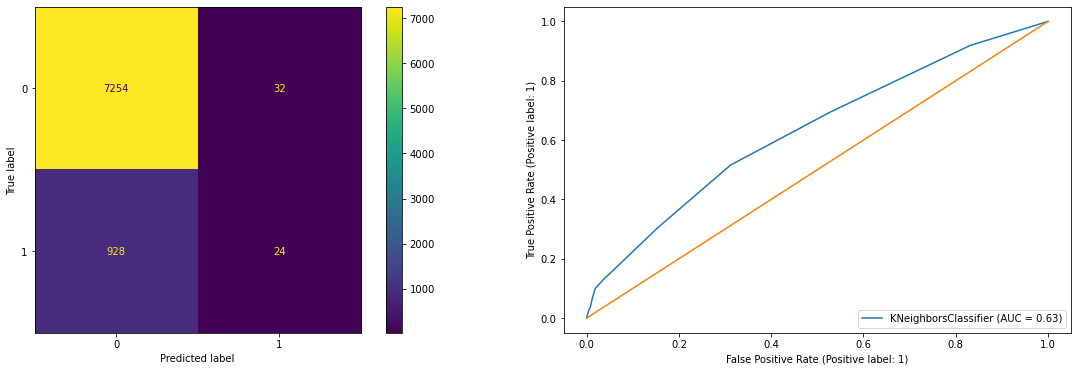

In [47]:
# print the tuned KNN score and the classification report
print('KNN tuned score is:', knn_tun.score(X_test, y_test),'\n')
print(
    f"Classification report for classifier {knn_tun}:\n"
    f"{metrics.classification_report(y_test, knn_tun.predict(X_test))}\n");

#print the confusion matrix and the ROC curve
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(knn_tun, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(knn_tun, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

Decision Tree tuned score is: 0.8833454722019908 

Classification report for classifier DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=10):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7286
           1       0.40      0.02      0.03       952

    accuracy                           0.88      8238
   macro avg       0.64      0.51      0.49      8238
weighted avg       0.83      0.88      0.83      8238




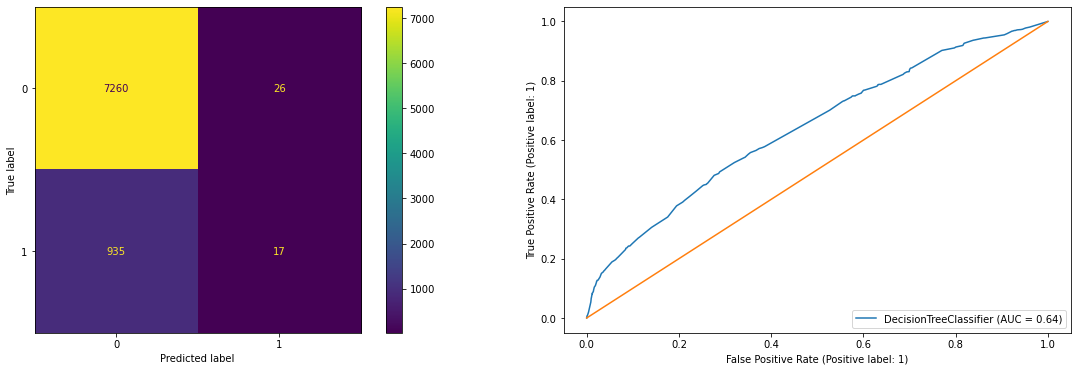

In [48]:
# print the tuned DecisionTree score and the classification report
print('Decision Tree tuned score is:', dtr_tun.score(X_test, y_test),'\n')
print(
    f"Classification report for classifier {dtr_tun}:\n"
    f"{metrics.classification_report(y_test, dtr_tun.predict(X_test))}\n");

#print the confusion matrix and the ROC curve
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(dtr_tun, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(dtr_tun, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

SVC tuned score is: 0.8844379703811605 

Classification report for classifier SVC(gamma=0.1):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7286
           1       0.00      0.00      0.00       952

    accuracy                           0.88      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.78      0.88      0.83      8238




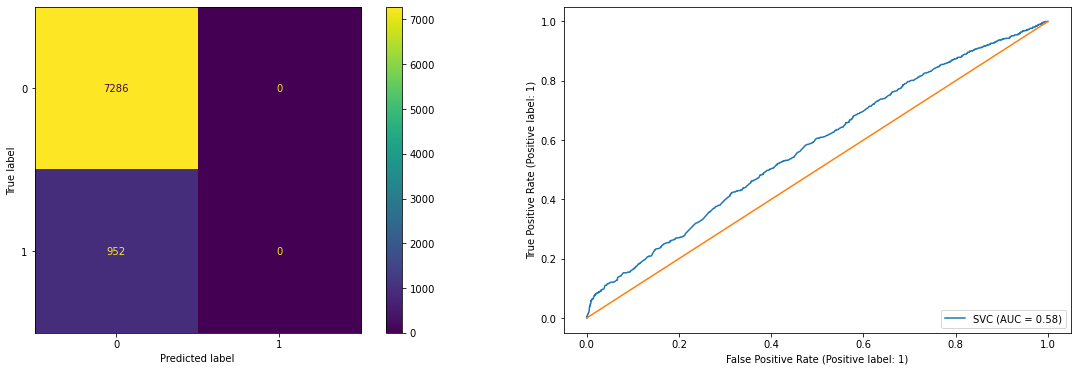

In [49]:
# print the tuned SVC score and the classification report
print('SVC tuned score is:', svc_tun.score(X_test, y_test),'\n')
print(
    f"Classification report for classifier {svc_tun}:\n"
    f"{metrics.classification_report(y_test, svc_tun.predict(X_test))}\n");

#print the confusion matrix and the ROC curve
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(svc_tun, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(svc_tun, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

#### Observation:

Decision Tree tuned model has the best performance, however with a rather weak attempt at correctly classifying the '1' label

Now that we found a reasonable model, let's see the feature importance:

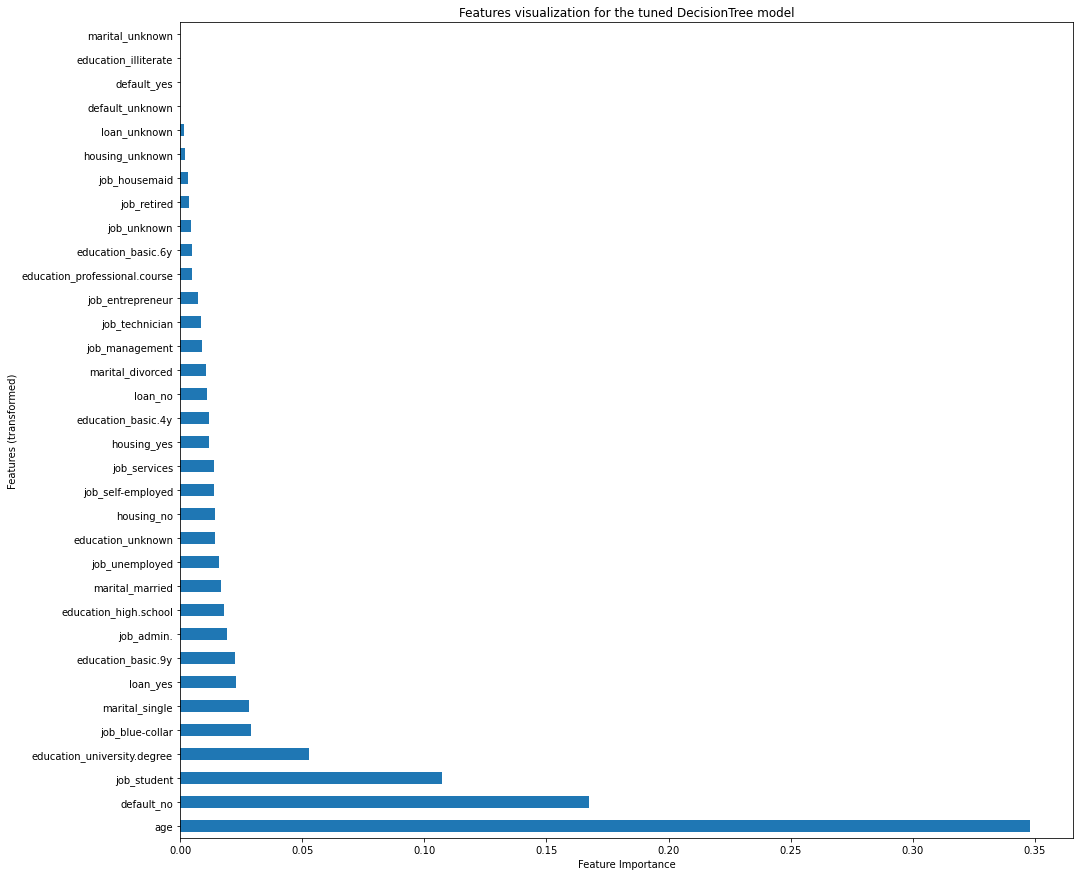

In [50]:
pipe_dtr = Pipeline([('transformer', col_transformer),
            ('model', dtr_tun)])
pipe_dtr.fit(Xi_train, y_train)
plt.figure(figsize = (16,15))
plt.title("Features visualization for the tuned DecisionTree model")
plt.ylabel("Features (transformed)")
plt.xlabel("Feature Importance")
feature_names = pipe_dtr[:-1].get_feature_names_out() 
features_clean = [i.split('__')[-1] for i in feature_names]
feat = pd.Series(
    pipe_dtr[-1].feature_importances_,    
    index=features_clean
)
feat.nlargest(50).plot(kind='barh');

Observation: customers with no default, along with the retired, students and university degree have the most influence on the classification

#### Other ways to improve the models

1. Changing the encoding method.

I tried various encoding methods, label encoding, ordinal encoding, but none produced any visible improvement on the models. The present notebook uses OneHotEncoding for all categorical features. I also tried the models with the 'age' column unchanged, no observable difference.

2. Changing the balance of the labels by oversampling or undersampling. 

I found that oversampling produces slightly better AUC for some models.

Below I tried oversampling and ran the analysis again. 

In [51]:
# reload the data
bank = pd.read_csv('data/bank-additional-full.csv', sep = ';')
# Take the full dataframe and reduce it to the indicated columns 1-7 (0-6)
# Will call the main dataframe 'df'
dfo = bank.drop(columns = ['contact','month','day_of_week','duration','campaign','pdays','previous',
                        'poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])
# 'age' has too many distinct values, so it might be a good solution to group in a fewer categories and encode
dfo.loc[df['age'] <= 35, 'age'] = 1
dfo.loc[(df['age'] > 35) & (dfo['age'] <= 40), 'age'] = 2
dfo.loc[(df['age'] > 40) & (dfo['age'] <= 50), 'age'] = 3
dfo.loc[(df['age'] > 50) & (dfo['age'] <= 60), 'age'] = 4
dfo.loc[(df['age'] > 60) & (dfo['age'] <= 67), 'age'] = 5
dfo.loc[df['age'] > 67, 'age'] = 6
dfo['y'] = dfo['y'].replace(['yes', 'no'], [1, 0])
dfo['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Oversampling

In [52]:
# separate classes
class_count_0, class_count_1 = dfo['y'].value_counts()

class_0 = dfo[dfo['y'] == 0]
class_1 = dfo[dfo['y'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (36548, 8)
class 1: (4640, 8)


In [53]:
# oversampling
class_1_over = class_1.sample(class_count_0, replace = True)
df_over = pd.concat([class_1_over, class_0], axis = 0)
#df_over['y'].value_counts()
dfo = df_over
dfo['y'].value_counts()

1    36548
0    36548
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

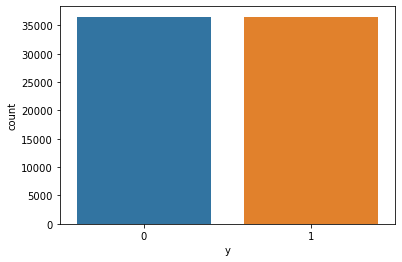

In [54]:
# labels countplot
sns.countplot(dfo['y'])

In [55]:
# create the feature categories and the column transformer
categ = ['job','marital','education','default','housing','loan']
col_transformer = ColumnTransformer([('ohe', OneHotEncoder(drop="if_binary"), categ)],
                            remainder = 'passthrough')

In [56]:
# create the train and test splits
X = dfo.drop('y', axis = 1)
y = dfo['y']
Xi_train, Xi_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [57]:
# transform the train and test data
X_train = col_transformer.fit_transform(Xi_train)
X_test = col_transformer.transform(Xi_test)

In [58]:
#inspect y_train and y_test
print(y_train.value_counts())
print(y_test.value_counts())

0    29277
1    29199
Name: y, dtype: int64
1    7349
0    7271
Name: y, dtype: int64


Grid search for the oversampled data. Using 'roc_auc' for scoring. 

In [59]:
# Logistic Regression grid
lgr = LogisticRegression()
params_lgr = {'C':np.logspace(-5, .5),
            'solver': ['lbfgs', 'liblinear'],
             'penalty' : ['l1','l2']}
o_grid_lgr = GridSearchCV(lgr, param_grid = params_lgr,
                   scoring = 'roc_auc').fit(X_train, y_train)
o_lgr_score = o_grid_lgr.score(X_test, y_test)
o_time_lgr = round((o_grid_lgr.cv_results_['mean_fit_time'].sum())*1000, 3)
o_lgr_par = o_grid_lgr.best_params_
print('lgr score is:', o_lgr_score)
print('fit time lgr is:',o_time_lgr)
print('lgr parameters:', o_lgr_par)

lgr score is: 0.6519534008118599
fit time lgr is: 33947.624
lgr parameters: {'C': 0.008286427728546842, 'penalty': 'l2', 'solver': 'lbfgs'}


In [60]:
# KNN grid
knn = KNeighborsClassifier()
params_knn = {'n_neighbors':range(1, 20, 2)}
o_grid_knn = GridSearchCV(knn, param_grid = params_knn,
                   scoring = 'roc_auc').fit(X_train, y_train)
o_knn_score = o_grid_knn.score(X_test, y_test)
o_time_knn = round((o_grid_knn.cv_results_['mean_fit_time'].sum())*1000, 3)
o_knn_par = o_grid_knn.best_params_
print('knn score is:', o_knn_score)
print('fit time knn is:',o_time_knn)
print('knn parameters:', o_knn_par)

knn score is: 0.6604021994820993
fit time knn is: 74.916
knn parameters: {'n_neighbors': 19}


In [61]:
# Decision Tree grid
dtr = DecisionTreeClassifier()
params_dtr = {'max_depth': [None, 3000, 50, 45, 30, 20, 10, 5, 3, 1],
         'min_samples_split': [2, 5, 10],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [1, 2, 3, 4]
             }
o_grid_dtr = GridSearchCV(dtr, param_grid = params_dtr,
                   scoring = 'roc_auc').fit(X_train, y_train)
o_dtr_score = o_grid_dtr.score(X_test, y_test)
o_time_dtr = round((o_grid_dtr.cv_results_['mean_fit_time'].sum())*1000, 3)
o_dtr_par = o_grid_dtr.best_params_
print('dtr score is:', o_dtr_score)
print('fit time dtr is:',o_time_dtr)
print('dtr parameters:', o_dtr_par)

dtr score is: 0.7005778411765909
fit time dtr is: 42220.008
dtr parameters: {'criterion': 'entropy', 'max_depth': 45, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [62]:
# SVC grid
svc = SVC()
params_svc = {'kernel': ['rbf','sigmoid'],'gamma': [0.1, 1.0, 10.0, 100.0]}
o_grid_svc = GridSearchCV(svc, param_grid = params_svc,
                   scoring = 'roc_auc').fit(X_train, y_train)
o_svc_score = o_grid_svc.score(X_test, y_test)
o_time_svc = round((o_grid_svc.cv_results_['mean_fit_time'].sum())*1000, 3)
o_svc_par = o_grid_svc.best_params_
print('svc score is:', o_svc_score)
print('fit time svc is:',o_time_svc)
print('svc parameters:', o_svc_par)

svc score is: 0.6488153953641143
fit time svc is: 1021515.263
svc parameters: {'gamma': 0.1, 'kernel': 'rbf'}


Now run the models with the optimal parameters

In [63]:
# Tuned Linear Regression
o_lgr_tun = LogisticRegression(C= o_lgr_par['C'], penalty= o_lgr_par['penalty'], solver= o_lgr_par['solver'])
start_l_t = time.time()
o_lgr_tun.fit(X_train, y_train)
stop_l_t = time.time()
o_t_lgr_tun = (stop_l_t-start_l_t)*1000
o_lgr_tun_acc_tr = accuracy_score(y_train, o_lgr_tun.predict(X_train))
o_lgr_tun_acc_ts = accuracy_score(y_test, o_lgr_tun.predict(X_test))

In [64]:
# Tuned KNN 
o_knn_tun = KNeighborsClassifier(n_neighbors = o_knn_par['n_neighbors'])
start_k_t = time.time()
o_knn_tun.fit(X_train, y_train)
stop_k_t = time.time()
o_t_knn_tun = (stop_k_t-start_k_t)*1000
o_knn_tun_acc_tr = accuracy_score(y_train, o_knn_tun.predict(X_train))
o_knn_tun_acc_ts = accuracy_score(y_test, o_knn_tun.predict(X_test))

In [65]:
# Tuned Decision Tree
o_dtr_tun = DecisionTreeClassifier(criterion= o_dtr_par['criterion'], 
                                 max_depth= o_dtr_par['max_depth'], 
                                 min_samples_leaf= o_dtr_par['min_samples_leaf'], 
                                 min_samples_split= o_dtr_par['min_samples_split'])
start_d_t = time.time()
o_dtr_tun.fit(X_train, y_train)
stop_d_t = time.time()
o_t_dtr_tun = (stop_d_t-start_d_t)*1000
o_dtr_tun_acc_tr = accuracy_score(y_train, o_dtr_tun.predict(X_train))
o_dtr_tun_acc_ts = accuracy_score(y_test, o_dtr_tun.predict(X_test))

In [66]:
# Tuned SVC
o_svc_tun = SVC(gamma= o_svc_par['gamma'], kernel= o_svc_par['kernel'])
start_s_t = time.time()
o_svc_tun.fit(X_train, y_train)
stop_s_t = time.time()
o_t_svc_tun = (stop_s_t-start_s_t)*1000
o_svc_tun_acc_tr = accuracy_score(y_train, o_svc_tun.predict(X_train))
o_svc_tun_acc_ts = accuracy_score(y_test, o_svc_tun.predict(X_test))

In [67]:
# putting the tuned results in a comparison table
o_data_tun = {'Tuned Model': ['Logistic Regression', 'KNN','Decision Tree', 'SVM'],
            'Train Time(ms)': [o_t_lgr_tun, o_t_knn_tun, o_t_dtr_tun, o_t_svc_tun],
            'Train Accuracy': [o_lgr_tun_acc_tr, o_knn_tun_acc_tr, o_dtr_tun_acc_tr, o_svc_tun_acc_tr],
            'Test Accuracy': [o_lgr_tun_acc_ts, o_knn_tun_acc_ts, o_dtr_tun_acc_ts, o_svc_tun_acc_ts],}
o_summary_t_df = pd.DataFrame(o_data_tun).set_index('Tuned Model')
print('\033[1m  Comparison Table for tuned models with oversample')
o_summary_t_df

  Comparison Table for tuned models with oversample


,Train Time(ms),Train Accuracy,Test Accuracy
Tuned Model,,,
Logistic Regression,177.920103,0.606146,0.603694
KNN,6.922007,0.630310,0.613406
Decision Tree,366.271973,0.652473,0.637209
SVM,186136.550903,0.619981,0.614774


Visualize the confusion matrix and the ROC-AUC graph. 

Logistic Regression tuned score is: 0.6036935704514363 

Classification report for classifier LogisticRegression(C=0.008286427728546842):
              precision    recall  f1-score   support

           0       0.61      0.56      0.59      7271
           1       0.60      0.65      0.62      7349

    accuracy                           0.60     14620
   macro avg       0.60      0.60      0.60     14620
weighted avg       0.60      0.60      0.60     14620




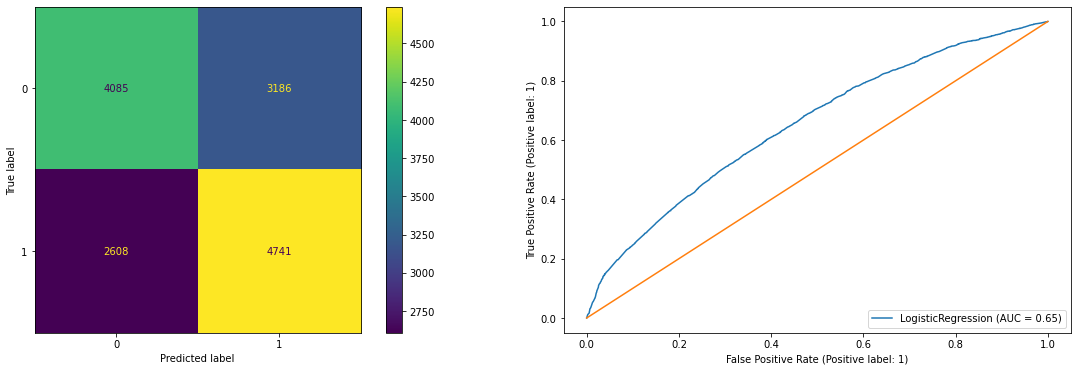

In [68]:
# print the tuned Logistic Regression score and the classification report
print('Logistic Regression tuned score is:', o_lgr_tun.score(X_test, y_test),'\n')
print(
    f"Classification report for classifier {o_lgr_tun}:\n"
    f"{metrics.classification_report(y_test, o_lgr_tun.predict(X_test))}\n");

#print the confusion matrix and the ROC curve
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(o_lgr_tun, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(o_lgr_tun, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

KNN tuned score is: 0.613406292749658 

Classification report for classifier KNeighborsClassifier(n_neighbors=19):
              precision    recall  f1-score   support

           0       0.63      0.52      0.57      7271
           1       0.60      0.70      0.65      7349

    accuracy                           0.61     14620
   macro avg       0.62      0.61      0.61     14620
weighted avg       0.62      0.61      0.61     14620




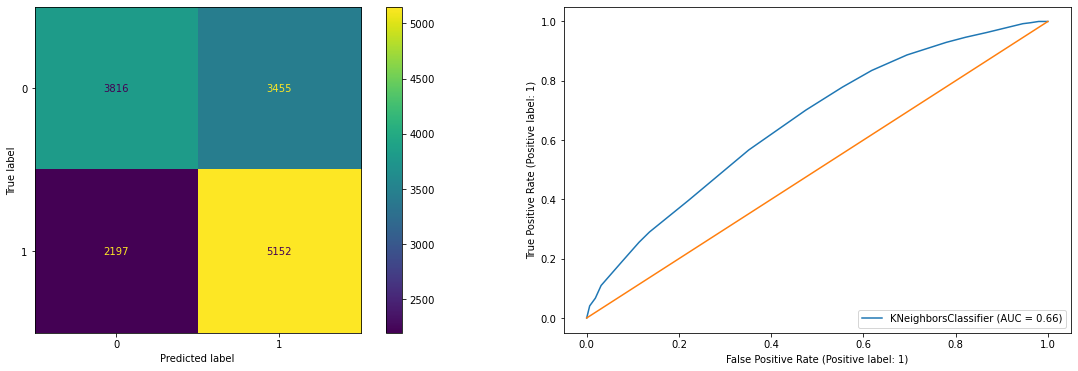

In [69]:
# print the tuned KNN score and the classification report
print('KNN tuned score is:', o_knn_tun.score(X_test, y_test),'\n')
print(
    f"Classification report for classifier {o_knn_tun}:\n"
    f"{metrics.classification_report(y_test, o_knn_tun.predict(X_test))}\n");

#print the confusion matrix and the ROC curve
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(o_knn_tun, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(o_knn_tun, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

Decision Tree tuned score is: 0.6372093023255814 

Classification report for classifier DecisionTreeClassifier(criterion='entropy', max_depth=45):
              precision    recall  f1-score   support

           0       0.65      0.58      0.62      7271
           1       0.63      0.69      0.66      7349

    accuracy                           0.64     14620
   macro avg       0.64      0.64      0.64     14620
weighted avg       0.64      0.64      0.64     14620




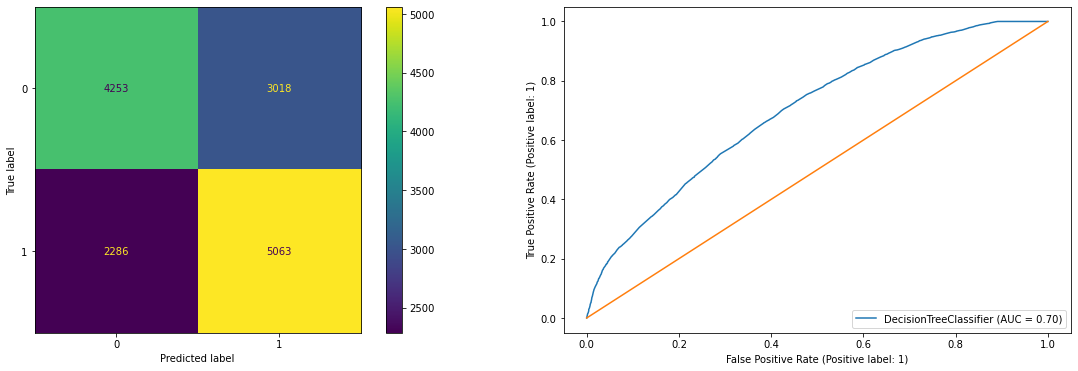

In [70]:
# print the tuned DecisionTree score and the classification report
print('Decision Tree tuned score is:', o_dtr_tun.score(X_test, y_test),'\n')
print(
    f"Classification report for classifier {o_dtr_tun}:\n"
    f"{metrics.classification_report(y_test, o_dtr_tun.predict(X_test))}\n");

#print the confusion matrix and the ROC curve
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(o_dtr_tun, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(o_dtr_tun, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

SVC tuned score is: 0.6147742818057456 

Classification report for classifier SVC(gamma=0.1):
              precision    recall  f1-score   support

           0       0.63      0.56      0.59      7271
           1       0.61      0.67      0.64      7349

    accuracy                           0.61     14620
   macro avg       0.62      0.61      0.61     14620
weighted avg       0.62      0.61      0.61     14620




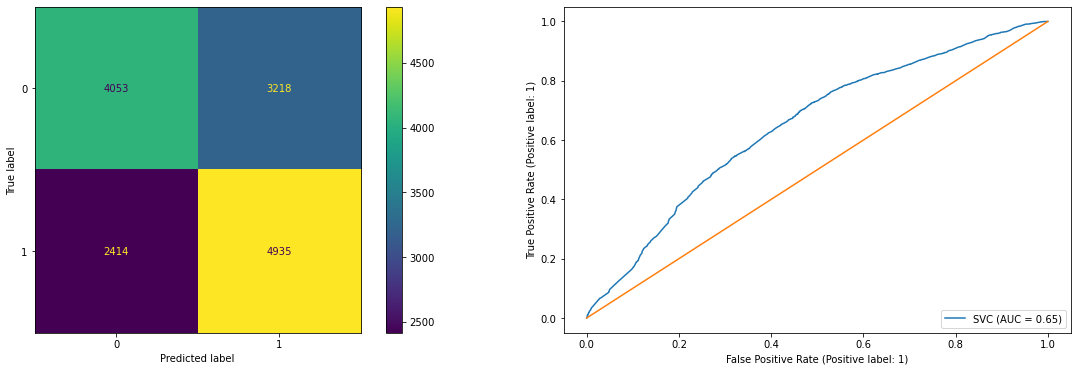

In [71]:
# print the tuned SVC score and the classification report
print('SVC tuned score is:', o_svc_tun.score(X_test, y_test),'\n')
print(
    f"Classification report for classifier {o_svc_tun}:\n"
    f"{metrics.classification_report(y_test, o_svc_tun.predict(X_test))}\n");

#print the confusion matrix and the ROC curve
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(o_svc_tun, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(o_svc_tun, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

#### Observation: 
Decision Tree for the oversampled dataset performs the best

Again visualize the feature importance for the oversampled dataset.

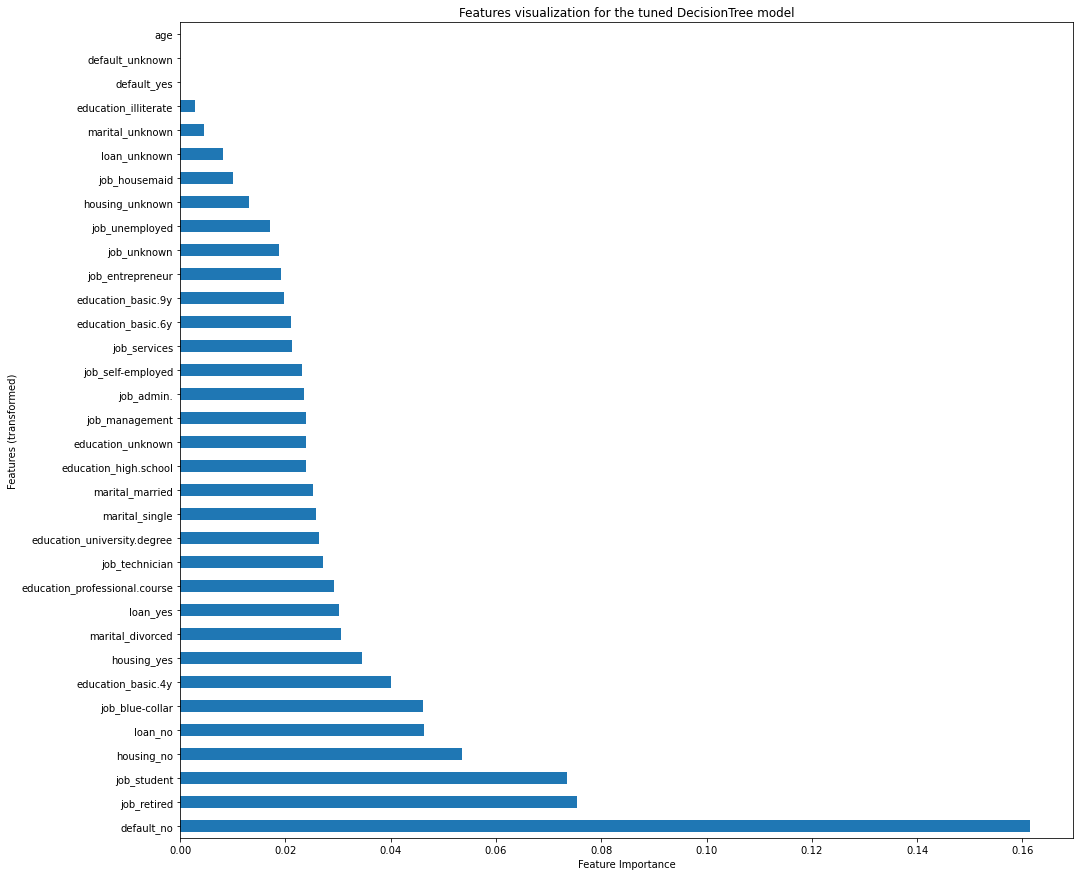

In [72]:
o_pipe_dtr = Pipeline([('transformer', col_transformer),
            ('model', o_dtr_tun)])
o_pipe_dtr.fit(Xi_train, y_train)
plt.figure(figsize = (16,15))
plt.title("Features visualization for the tuned DecisionTree model")
plt.ylabel("Features (transformed)")
plt.xlabel("Feature Importance")
feature_names = o_pipe_dtr[:-1].get_feature_names_out() 
features_clean = [i.split('__')[-1] for i in feature_names]
feat = pd.Series(
    o_pipe_dtr[-1].feature_importances_,    
    index=features_clean
)
feat.nlargest(50).plot(kind='barh');

Observation: More features play a higher role in the classification model than in the original dataset. 

### Conclusions

1. The labels in this dataset are very unbalanced, which shows that data collecting was either biased in some ways, or the overall customer true sentiment is that subscribing to a new deposit is not something they want. The unbalanced nature gives limited chances for the models to work well. 
2. The data collected through the marketing campaigns is not relevant. More than this, to the campaign-collected data they had to add extra attributes from internal bank databases. 
3. The task limited the features to the first 7 columns which represent core bank customer data. This has influence on the models performance.
4. The best model for the task of classifying the customers, with a chance of classifying on both labels, is the Decision Tree Classifier.
5. AUC has been used as the principal performance criteria. All models performed better than the baseline, which in itself is a good thing
6. The machine time for fitting the models is significant and Grid Searching is a very time-costly process. However, the actual fit time of a tuned model is reasonable.
#### Overall conclusion: Unable to produce a truly useful model which can be used for classifying the customers.

##### Questions

#### Next steps
1. What can be done to improve the models:
    * include all the features from the original full dataset and redo the 
    * manually remove rows to balance the labels
    * include all the available hyperparameters fora each model, using large ranges for the parameter values.
    * refine the encoding of the categorical data
    * use only a few features, such as 'default', 'education', 'job'
2. What to advise the bank regarding future campaigns?
    * change the data collected, since the existing data is not very useful for predicting customer decision
    * change the offer to something different, a better and more attractive banking product